# Montgomery Crime Predictor Modeling
---

## Target = 'Street name'
### Dataset Source: [dataMontgomery](https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3)
---

### Column Description of Original Dataset
ID - Police Incident Number

Offense Code - Offense_Code is the code for an offense committed within the incident as defined by the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program.

CR Number - Police Report Number

Dispatch Date/Time - The actual date and time a Officer was dispatched

NIBRS Code - FBI NIBRS codes: National Incident-Based Reporting System (NIBRS) is an incident-based reporting system used by law enforcement agencies in the United States for collecting and reporting data on crimes. Local, state and federal agencies generate NIBRS data from their records management systems.

Victims - Number of Victims

Crime Name1 - Crime against Society/Person/Property or Other

Crime Name2 - Describes the NIBRS_CODE

Crime Name3 - Describes the OFFENSE_CODE

Police District Name - Name of District (Rockville,Weaton etc.)

Block Address - Address in 100 block level

City - City Name

State - State(Maryland)

Zip Code - Zip code

Agency - Assigned Police Department

Place - Place description

Sector - Police sector name, a subset of District

Beat - Police patrol area, a subset of Sector

PRA - Police Response Area, a subset of Beat

Address Number - House or Business Number

Street Prefix - North, South, East, West

Street Name - Name of the Street

Street Suffix - Quadrant (NW, SW, etc)

Street Type - Ave, Drive, Road, etc

Start_Date_Time - Occurred from date/time

End_Date_Time - Occurred to date/time

Latitude - Latitude Coordinate

Longitude - Longitude Coordinate

Police District Number - Major Police Boundary

Location - Location Coordinate

In [33]:
# import pandas as pd 
import os

# All imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas_profiling as pp

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score

# scipy
import scipy.stats as st
from scipy.stats import uniform, randint

from sklearn import tree
from sklearn.model_selection import cross_val_score

# pipeline
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from category_encoders.ordinal import OrdinalEncoder

# plotly
import plotly.express as px

# date-time
from datetime import datetime

# eli5
import eli5
from eli5.sklearn import PermutationImportance

# pdp
from pdpbox import pdp

In [34]:
# XGB
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [35]:
# model loader
import joblib

In [36]:
# Set pandas's max row display
pd.set_option('display.max_row',1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns',200)

# Set Seaborn style to default
sns.set_style('darkgrid')

In [37]:
pwd

'/Users/yonipineda/lambda_folder/montgomery-crime-project/Montgomery-Project/notebooks'

In [38]:
# load cleaned df
# loading in the smaller version of the cleaned data.
# git and dash will prefer that, don't really have another solution.
df = pd.read_csv('Cleaned_Crime.csv', index_col=0)

In [39]:
# check df
s = df.shape
print(f"Assert the shape is correct: {s}")
df.head()

Assert the shape is correct: (38046, 27)


,Victims,Crime_Type,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Second,Minute,Hour,Week,Day,Month,Year
99,1,Other,MONTGOMERY VILLAGE,700 BLK RUSSELL AVE,GAITHERSBURG,MD,20877.0,MCPD,Parking Lot - Commercial,R,6R1,548.0,700.0,W,RUSSELL,E,AVE,39.150670,-77.204063,6D,0,42,10,43,27,10,2019
102,1,Crime Against Society,GERMANTOWN,Other Block Address,GERMANTOWN,MD,20874.0,MCPD,Parking Lot - Commercial,M,5M1,470.0,19700.0,W,FREDERICK,E,RD,39.178539,-77.238524,5D,0,44,21,26,1,7,2016
108,1,Crime Against Society,WHEATON,Other Block Address,SILVER SPRING,MD,20902.0,MCPD,Other Place,L,4L1,366.0,23600.0,W,GEORGIA,E,AVE,39.055842,-77.049960,4D,0,15,2,2,8,1,2020
118,1,Crime Against Society,WHEATON,Other Block Address,SILVER SPRING,MD,20902.0,MCPD,Other Place,L,4L1,536.0,12300.0,W,GEORGIA,E,AVE,39.058066,-77.050032,4D,0,27,20,26,1,7,2016
124,1,Crime Against Property,WHEATON,Other Block Address,SILVER SPRING,MD,20902.0,MCPD,Other Place,L,4L1,360.0,1100.0,W,UNIVERSITY,W,BLV,39.035857,-77.026918,4D,0,33,14,42,19,10,2019


In [67]:
# data types
df.dtypes

Victims                     int64
Crime_Type                 object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                       float64
Address Number            float64
Street Prefix              object
Street Name                object
Street Suffix              object
Street Type                object
Latitude                  float64
Longitude                 float64
Police District Number     object
Second                      int64
Minute                      int64
Hour                        int64
Week                        int64
Day                         int64
Month                       int64
Year                        int64
dtype: object

# Prediction Model 
---

In the Montgomery_Cleaning notebook, There is a model with a good test score. Will use that. Maybe Ill try something new, maybe.

### Split Data

In [41]:
# Train/test splits 
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [42]:
# train val split
train, val = train_test_split(train, test_size=0.2, random_state=42)

In [43]:
# checking shape
tr = train.shape
v = val.shape
te = test.shape
print(f"Split Shape: Train {tr}, Validate {v}, Test {te}")

Split Shape: Train (24348, 27), Validate (6088, 27), Test (7610, 27)


In [44]:
# NEW TARGET: AS OF 5/30/20
train['Street Name'].value_counts(normalize=True)

GEORGIA          0.251602
FREDERICK        0.159561
VEIRS MILL       0.133481
UNIVERSITY       0.102883
NEW HAMPSHIRE    0.102760
ROCKVILLE        0.095490
COLESVILLE       0.064194
RANDOLPH         0.045301
RUSSELL          0.044726
Name: Street Name, dtype: float64

In [45]:
# columns
train.columns

Index(['Victims', 'Crime_Type', 'Police District Name', 'Block Address',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix',
       'Street Type', 'Latitude', 'Longitude', 'Police District Number',
       'Second', 'Minute', 'Hour', 'Week', 'Day', 'Month', 'Year'],
      dtype='object')

### Set Features and Target

In [46]:
# Set target and features
target = 'Street Name'

features = ['Place', 'Hour', 'Minute', 'Month', 'Year', 'City', 'Zip Code', 'Sector', 'Police District Name']

#features = train.drop(columns=target).columns.tolist()
# set train, val, test with target and feature
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [47]:
# concat
X_train_cat = pd.concat([X_train, X_val])
y_train_cat = pd.concat([y_train, y_val])

### Train the data on a RandomForest model with GridSearch for hyper-param optimization. 

In [48]:
# pipe using GridSearchCV
pipe = Pipeline([
                        ('encoder', OrdinalEncoder()),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('model', RandomForestClassifier())
])

In [49]:
# using GridsearchCV to get best parameters
params = {
    "model__min_samples_leaf": [1, 2, 3]
}

search = GridSearchCV(pipe, params, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_) 

Best parameter (CV score=0.767):
{'model__min_samples_leaf': 2}


In [50]:
# pipe with suggested min_sample_leaf - 3
pipe = Pipeline([
                        ('encoder', OrdinalEncoder()),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('model', RandomForestClassifier(min_samples_leaf=3))
])

In [51]:
# fit pipe
%time pipe.fit(X_train_cat, y_train_cat)

CPU times: user 691 ms, sys: 28.8 ms, total: 720 ms
Wall time: 590 ms


Pipeline(memory=None,
         steps=[('encoder',
                 OrdinalEncoder(cols=['Place', 'City', 'Sector',
                                      'Police District Name'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Place',
                                          'data_type': dtype('O'),
                                          'mapping': Other Place                     1
Residence - Apartment/Condo     2
Parking Lot - Commercial        3
Street - In vehicle             4
Residence - Single Family       5
Other/Unknown                   6
Parking...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                        

In [52]:
# check score
print('Validation Accuracy:', pipe.score(X_val, y_val))

Validation Accuracy: 0.8662943495400789


In [53]:
# Fitting the model to the test dataset
pipe.fit(X_test, y_test)

Pipeline(memory=None,
         steps=[('encoder',
                 OrdinalEncoder(cols=['Place', 'City', 'Sector',
                                      'Police District Name'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Place',
                                          'data_type': dtype('O'),
                                          'mapping': Other Place                     1
Residence - Apartment/Condo     2
Parking Lot - Commercial        3
Street - In vehicle             4
Residence - Single Family       5
Other/Unknown                   6
Parking...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                        

In [54]:
# Predict our test sample using pipe4
y_pred = pipe.predict(X_test)

In [55]:
# Test score
# Test score = ~59%
print('Test Score Using RandomForestClassifier W/ GridSearchCV:', accuracy_score(y_test, y_pred))

Test Score Using RandomForestClassifier W/ GridSearchCV: 0.8550591327201051


## Gradient Bosst Classifier Model

In [17]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

learning_rates = [0.5, 0.1, 0.25, 0.5, 0.75, 1]
for rate in learning_rates:
    pipe = make_pipeline(
        ce.OrdinalEncoder(),
        XGBClassifier(n_esimators=200, learning_rate=rate,
                       max_features=9, max_depth=15, random_state=42
                     )
    )
    %time pipe.fit(X_train_cat, y_train_cat)
    print(f"Learning Rate: {rate}")
    print("Accuracy Score: {0:3f}".format(pipe.score(X_train_cat, y_train_cat)))

CPU times: user 1min 17s, sys: 218 ms, total: 1min 18s
Wall time: 1min 18s
Learning Rate: 0.5
Accuracy Score: 0.990998
CPU times: user 1min 16s, sys: 167 ms, total: 1min 16s
Wall time: 1min 16s
Learning Rate: 0.1
Accuracy Score: 0.954363
CPU times: user 1min 17s, sys: 179 ms, total: 1min 17s
Wall time: 1min 17s
Learning Rate: 0.25
Accuracy Score: 0.988993
CPU times: user 1min 17s, sys: 182 ms, total: 1min 18s
Wall time: 1min 18s
Learning Rate: 0.5
Accuracy Score: 0.990998
CPU times: user 1min 16s, sys: 223 ms, total: 1min 16s
Wall time: 1min 17s
Learning Rate: 0.75
Accuracy Score: 0.990998
CPU times: user 1min 14s, sys: 159 ms, total: 1min 14s
Wall time: 1min 15s
Learning Rate: 1
Accuracy Score: 0.990998


In [25]:
# Fitting the XGBoost model to the test dataset
y_pred = gb.fit(X_test, y_test)

## Visualizations for the Model

- Will be used for the insights and process page in the app

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

#The classification_report will give precision, recall, and F1
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   COLESVILLE       0.88      0.54      0.67       481
    FREDERICK       0.96      0.95      0.96      1183
      GEORGIA       0.79      0.91      0.84      1956
NEW HAMPSHIRE       0.89      0.97      0.93       782
     RANDOLPH       0.84      0.45      0.58       337
    ROCKVILLE       0.91      0.99      0.95       743
      RUSSELL       0.89      0.90      0.89       340
   UNIVERSITY       0.89      0.71      0.79       769
   VEIRS MILL       0.77      0.84      0.80      1019

     accuracy                           0.86      7610
    macro avg       0.87      0.81      0.82      7610
 weighted avg       0.86      0.86      0.85      7610



#### Feature Importance

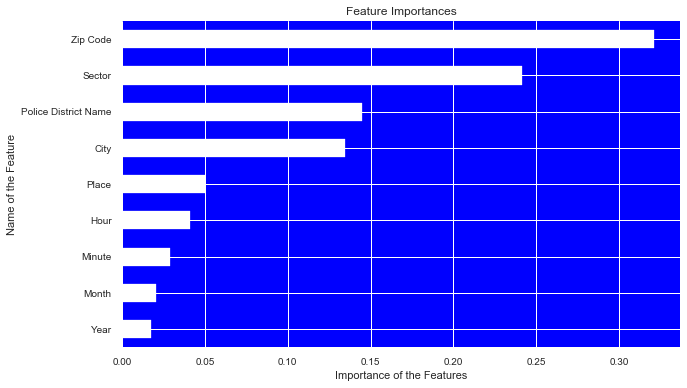

In [57]:
# Feature Importance for my final selected model
# The time and place is a great predictor of the type of crimes that will occur
pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = "mean"),
    RandomForestClassifier(max_depth = 15, n_estimators = 824, 
                           min_samples_leaf = 5, random_state = 42, n_jobs = -1)
    )

pipe.fit(X_train_cat, y_train_cat)

rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
plt.figure(figsize=(10,6))
plt.rcParams['axes.facecolor'] = 'blue'
plt.title("Feature Importances")
plt.xlabel("Importance of the Features")
plt.ylabel("Name of the Feature")
importances.sort_values().plot.barh(color='white');

### Permutation Feature Importance

In [58]:
# set up for Permutation Feature Importance
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [59]:
# 1. Fit permuter
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [60]:
# features names
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Month                   0.025427
Year                    0.026971
Minute                  0.031307
Hour                    0.048949
Place                   0.052004
Police District Name    0.064225
City                    0.091032
Zip Code                0.152694
Sector                  0.239816
dtype: float64

In [61]:
# eli5 Permutation feature importance
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.2398 ± 0.0076,Sector
0.1527 ± 0.0097,Zip Code
0.0910 ± 0.0061,City
0.0642 ± 0.0040,Police District Name
0.0520 ± 0.0065,Place
0.0489 ± 0.0060,Hour
0.0313 ± 0.0031,Minute
0.0270 ± 0.0094,Year
0.0254 ± 0.0064,Month


## Partial Dependence Plot

In [149]:
from pdpbox.pdp import pdp_isolate, pdp_plot

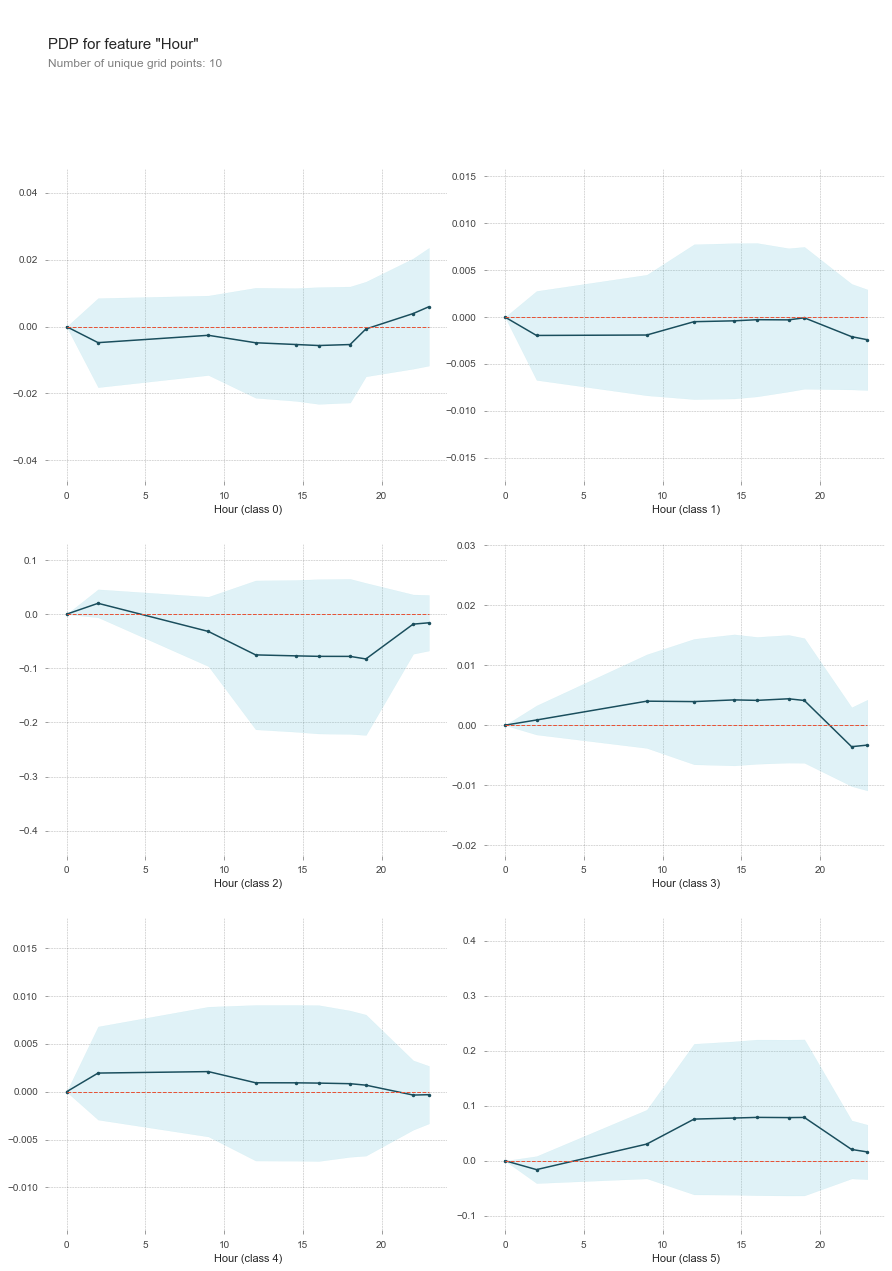

In [157]:
# pdp plot for Hour
plt.rcParams['figure.dpi'] = 72

%matplotlib inline
feature = "Hour"
isolated = pdp.pdp_isolate(model = pipe, 
                                 dataset = X_test, 
                                 model_features = X_test.columns, 
                                 feature = feature)
pdp_plot(isolated, feature_name=feature);

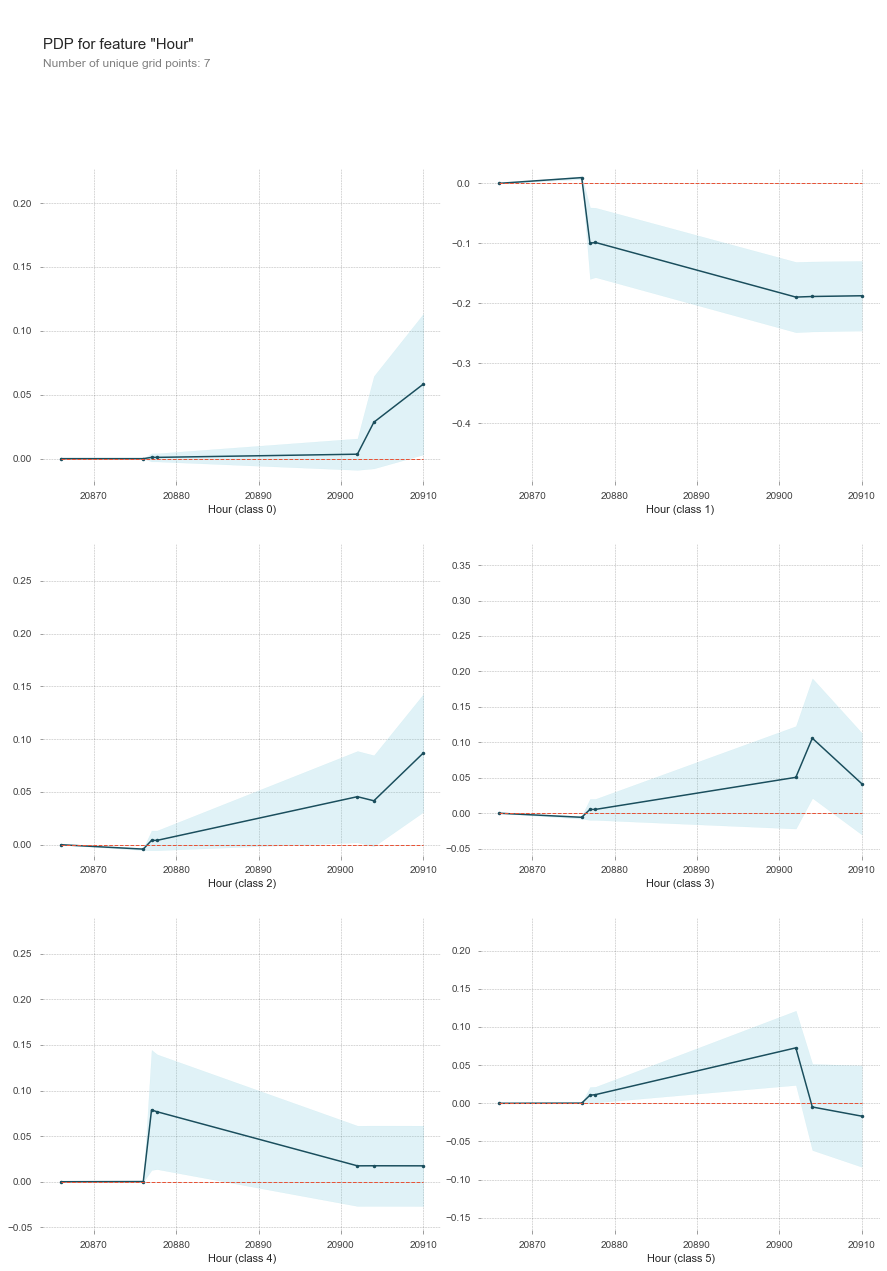

In [161]:
# pdp plot for Minute
%matplotlib inline
feature0 = "Zip Code"
isolated = pdp.pdp_isolate(model = pipe, 
                                 dataset = X_test, 
                                 model_features = X_test.columns, 
                                 feature = feature0)
pdp_plot(isolated, feature_name=feature);

(<Figure size 1080x1764 with 13 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1fb99050>,
  'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x1c70d8f490>,
   <matplotlib.axes._subplots.AxesSubplot at 0x1a1e4a6a10>]})

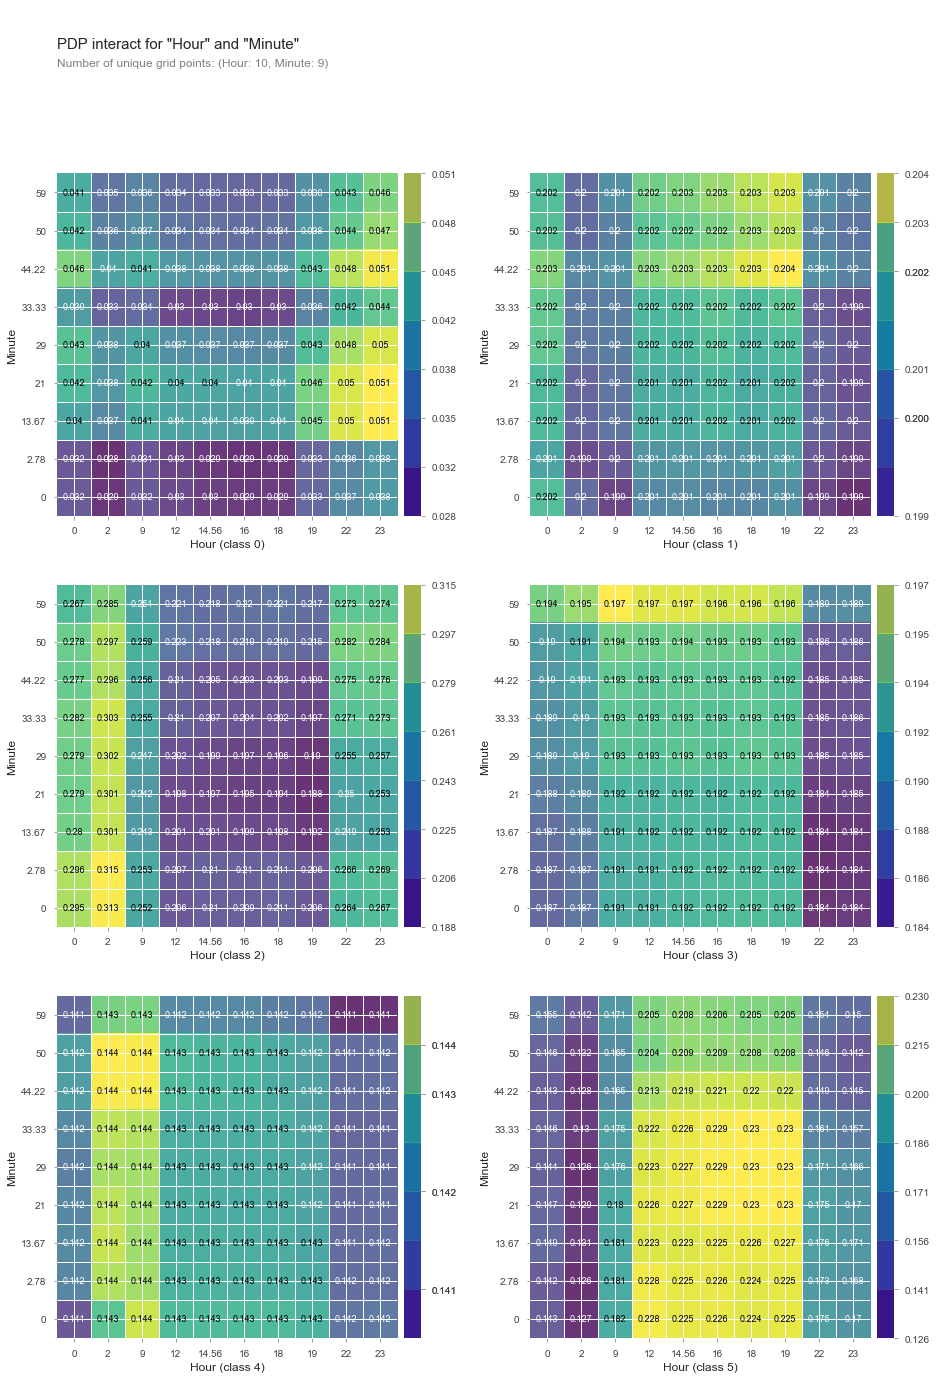

In [159]:
# feature interaction partial dependence plot (heatmap) with Hour and Minute
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features =['Hour','Minute']

interaction = pdp_interact(model=pipe, dataset=X_test, 
                           model_features=X_test.columns, features=features)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

(<Figure size 1080x1764 with 13 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c71077e10>,
  'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x1a222c6610>,
   <matplotlib.axes._subplots.AxesSubplot at 0x1a23311450>]})

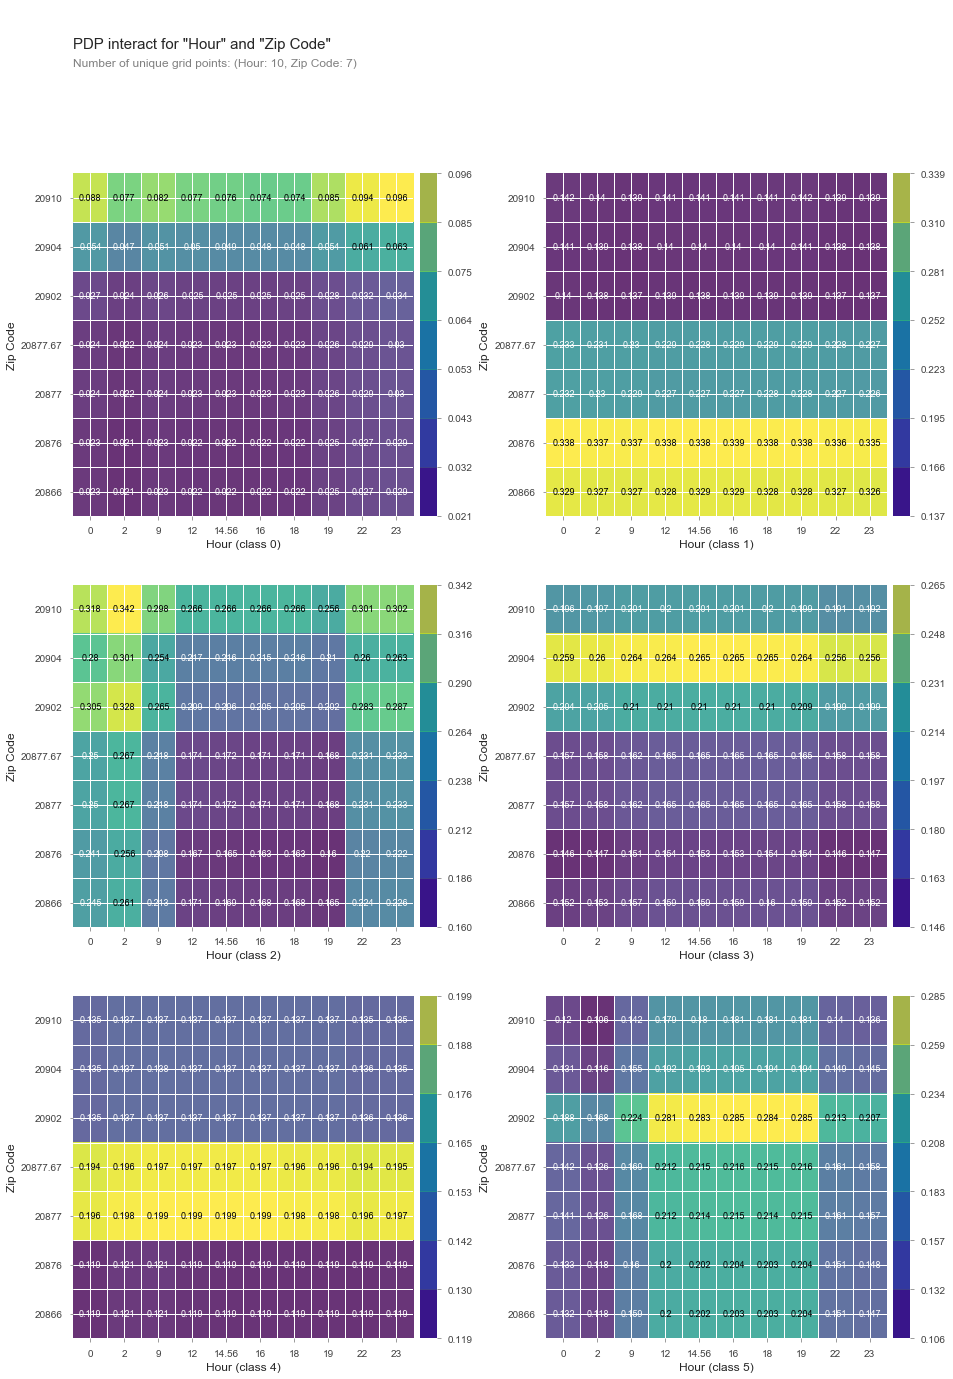

In [160]:
# feature interaction partial dependence plot (heatmap) with Hour and Victims
features =['Hour','Zip Code']

interaction = pdp_interact(model=pipe, dataset=X_test, 
                           model_features=X_test.columns, features=features)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

(<Figure size 1080x1764 with 13 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a21d585d0>,
  'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x1c70c98ed0>,
   <matplotlib.axes._subplots.AxesSubplot at 0x1a23dede50>]})

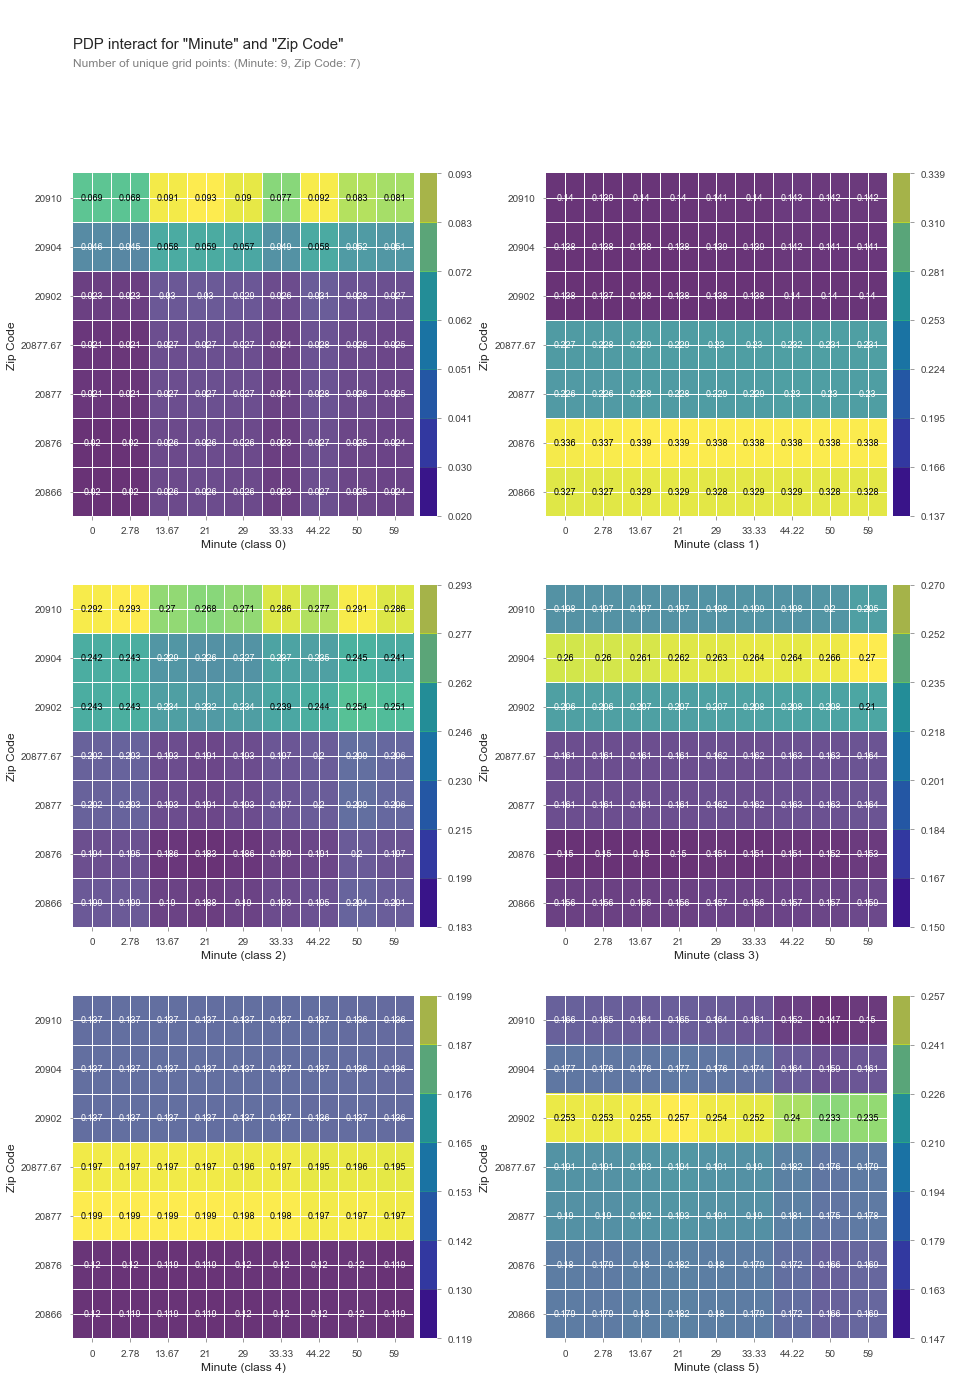

In [162]:
# feature interaction partial dependence plot (heatmap) with Minute and Victims
features =['Minute','Zip Code']

interaction = pdp_interact(model=pipe, dataset=X_test, 
                           model_features=X_test.columns, features=features)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

# Save the Model

In [66]:
# model dumped 
filename = 'big_finalized_model.joblib'
joblib.dump(pipe, filename, compre)

['big_finalized_model.joblib']

# Shap for App

In [62]:
import shap

In [63]:
encoder = pipe.named_steps['ordinalencoder']
model = pipe.named_steps['randomforestclassifier']

In [165]:
from joblib import dump, load
explainer = shap.TreeExplainer(model)
dump(explainer, 'explainer.joblib')

['explainer.joblib']